In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
data = pd.read_csv('tvads.csv', delimiter = ';')
x = data.iloc[:, 0].tolist()  
y = data.iloc[:, 1].tolist() 
print(X)

[230.1, 44.5, 17.2, 151.5, 180.8, 8.7, 57.5, 120.2, 8.6, 199.8, 66.1, 214.7, 23.8, 97.5, 204.1, 195.4, 67.8, 281.4, 69.2, 147.3, 218.4, 237.4, 13.2, 228.3, 62.3, 262.9, 142.9, 240.1, 248.8, 70.6, 292.9, 112.9, 97.2, 265.6, 95.7, 290.7, 266.9, 74.7, 43.1, 228.0, 202.5, 177.0, 293.6, 206.9, 25.1, 175.1, 89.7, 239.9, 227.2, 66.9, 199.8, 100.4, 216.4, 182.6, 262.7, 198.9, 7.3, 136.2, 210.8, 210.7, 53.5, 261.3, 239.3, 102.7, 131.1, 69.0, 31.5, 139.3, 237.4, 216.8, 199.1, 109.8, 26.8, 129.4, 213.4, 16.9, 27.5, 120.5, 5.4, 116.0, 76.4, 239.8, 75.3, 68.4, 213.5, 193.2, 76.3, 110.7, 88.3, 109.8, 134.3, 28.6, 217.7, 250.9, 107.4, 163.3, 197.6, 184.9, 289.7, 135.2, 222.4, 296.4, 280.2, 187.9, 238.2, 137.9, 25.0, 90.4, 13.1, 255.4, 225.8, 241.7, 175.7, 209.6, 78.2, 75.1, 139.2, 76.4, 125.7, 19.4, 141.3, 18.8, 224.0, 123.1, 229.5, 87.2, 7.8, 80.2, 220.3, 59.6, 0.7, 265.2, 8.4, 219.8, 36.9, 48.3, 25.6, 273.7, 43.0, 184.9, 73.4, 193.7, 220.5, 104.6, 96.2, 140.3, 240.1, 243.2, 38.0, 44.7, 280.7, 121.0

In [46]:
X_scaled = (x - np.mean(x)) / np.std(x)
Y_scaled = (y - np.mean(y)) / np.std(y)

# Implementing gradient descent
def gradient_descent(X, Y, learning_rate, epochs):
    m = np.random.randn()  # Starting with a random m
    b = np.random.randn()  # Starting with a random b
    N = len(X)
    mse_history = []

    for epoch in range(epochs):
        Y_pred = m*X + b
        mse = np.mean((Y - Y_pred)**2)
        mse_history.append(mse)

        dm = (-2/N) * np.sum(X * (Y - Y_pred))
        db = (-2/N) * np.sum(Y - Y_pred)

        m -= learning_rate * dm
        b -= learning_rate * db

    return m, b, mse_history

# Choose a learning rate that you have determined is suitable
learning_rate = 0.01  # Example learning rate
epochs = 1000
m_final, b_final, mse_history = gradient_descent(X_scaled, Y_scaled, learning_rate, epochs)



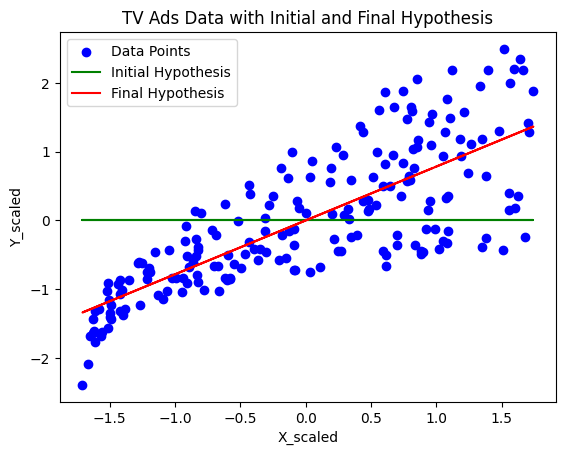

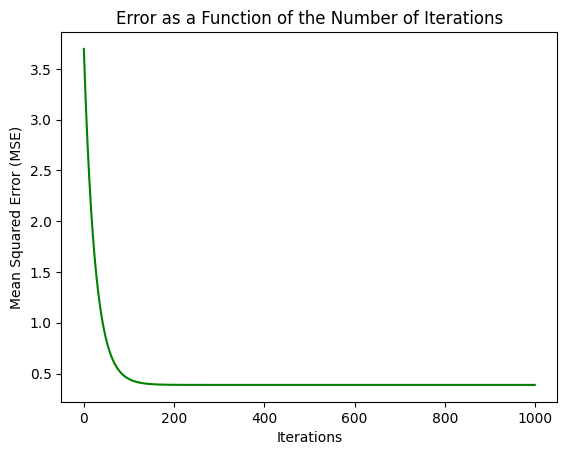

In [52]:

m_initial = 0
b_initial = 0

plt.scatter(X_scaled, Y_scaled, color='blue', label='Data Points')
plt.plot(X_scaled, m_initial*X_scaled + b_initial, color='green', label='Initial Hypothesis')
plt.plot(X_scaled, m_final*X_scaled + b_final, color='red', label='Final Hypothesis')
plt.xlabel('X_scaled')
plt.ylabel('Y_scaled')
plt.legend()
plt.title('TV Ads Data with Initial and Final Hypothesis')
plt.show()

# Plot 2: Error (MSE) as a function of the number of iterations
plt.plot(mse_history, color='green')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Error as a Function of the Number of Iterations')
plt.show()


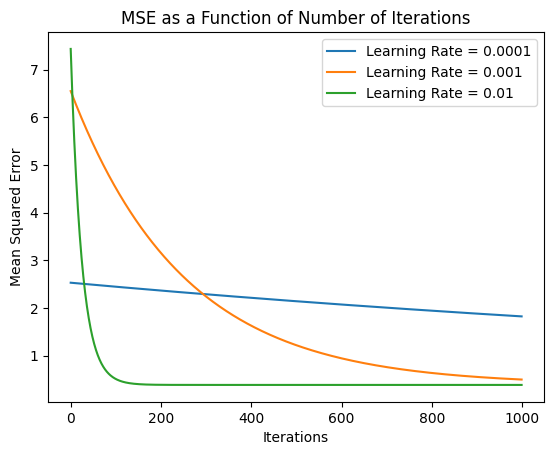

In [53]:
learning_rates = [0.0001, 0.001, 0.01]  # Example: small, suitable, and large learning rate

# Dictionary to store mse history for each learning rate
learning_rate_mse_histories = {}

# Run gradient descent with each learning rate and collect MSE history
for lr in learning_rates:
    _, _, mse_history = gradient_descent(X_scaled, Y_scaled, lr, epochs=1000)
    learning_rate_mse_histories[lr] = mse_history

# Plotting the MSE history for each learning rate
for lr, mse_history in learning_rate_mse_histories.items():
    plt.plot(mse_history, label=f'Learning Rate = {lr}')

plt.title('MSE as a Function of Number of Iterations')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()


**Conclusion of Exercise2.3 :The smaller learning rate, the longer it needs to run. If the learning rate too large, it will converge very fast.**

The maximum likelihood estimator (MLE) for a parameter is the value that maximizes the likelihood function for a given set of data. For a Bernoulli distribution, where each trial can result in just two possible outcomes (often termed "success" and "failure"), the likelihood function $L$ for observing $x_1, x_2, \ldots, x_n$ given the success probability $p$ is the product of the individual probabilities for each outcome:

$$ L(p; x_1, x_2, \ldots, x_n) = p^{(\sum_{i=1}^n x_i)}(1 - p)^{(n - \sum_{i=1}^n x_i)} $$

Here, $x_i$ is the outcome of each trial (1 for success and 0 for failure), and $\sum_{i=1}^n x_i$ is the total number of successes in all $n$ trials.

To find the MLE, we take the derivative of the log-likelihood function with respect to $p$, set it to zero, and solve for $p$. The log-likelihood function is the natural logarithm of the likelihood function:

$$ \log L(p; x_1, x_2, \ldots, x_n) = \left(\sum_{i=1}^n x_i\right) \log(p) + \left(n - \sum_{i=1}^n x_i\right) \log(1 - p) $$

Taking the derivative of the log-likelihood function with respect to $p$ gives:

$$ \frac{d}{dp} \log L(p; x_1, x_2, \ldots, x_n) = \frac{\sum_{i=1}^n x_i}{p} - \frac{n - \sum_{i=1}^n x_i}{1 - p} $$

Setting the derivative to zero and solving for $p$ yields:

$$ \frac{\sum_{i=1}^n x_i}{p} = \frac{n - \sum_{i=1}^n x_i}{1 - p} $$

$$ \Rightarrow \sum_{i=1}^n x_i(1 - p) = p(n - \sum_{i=1}^n x_i) $$

$$ \Rightarrow \sum_{i=1}^n x_i - p\sum_{i=1}^n x_i = pn - p\sum_{i=1}^n x_i $$

$$ \Rightarrow \sum_{i=1}^n x_i = pn $$

$$ \Rightarrow p = \frac{\sum_{i=1}^n x_i}{n} $$

Therefore, the MLE $\hat{p}$ for the parameter $p$ of a Bernoulli distribution is the sample mean of the observed data:

$$ \hat{p} = \frac{1}{n}\sum_{i=1}^n x_i $$

This makes intuitive sense: the MLE of the success probability in a sequence of Bernoulli trials is simply the fraction of trials that resulted in success.
